<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Dependencies" data-toc-modified-id="Dependencies-1">Dependencies</a></span></li><li><span><a href="#Functions" data-toc-modified-id="Functions-2">Functions</a></span></li><li><span><a href="#Paths" data-toc-modified-id="Paths-3">Paths</a></span></li><li><span><a href="#Main" data-toc-modified-id="Main-4">Main</a></span><ul class="toc-item"><li><span><a href="#Barplot-for-cancers-and-groups" data-toc-modified-id="Barplot-for-cancers-and-groups-4.1">Barplot for cancers and groups</a></span></li></ul></li></ul></div>

# Dependencies

# Functions

In [2]:
source("~/OneDrive - UHN/R_src/ggplot2_theme.R")
source("~/OneDrive - UHN/R_src/color_schemes.R")

# Paths

In [3]:
manifestpath <- "/Users/anabbi/OneDrive - UHN/Documents/IPD2/Manifests/"
datapath <- "/Users/anabbi/OneDrive - UHN/Documents/IPD2/Data/"
plotpath <- "/Users/anabbi/OneDrive - UHN/Documents/IPD2/Plots/"

# Main

## Barplot for cancers and groups

In [4]:
load(paste0(datapath,"ESTIMATE/estimate_manifest_primary_clean_final.RData"))

In [5]:
ped <- estimate_manifest_primary_clean[ estimate_manifest_primary_clean$group != "TCGA",]

In [6]:
tab <- as.data.frame(table(ped$cohort), stringsAsFactors = F)
tab <- tab[order(tab$Freq, decreasing = T),]

In [7]:
head(tab)

,Var1,Freq
,<chr>,<int>
11,pedLGG,298
6,MB,208
8,NBL,151
10,pedHGG,83
4,EPN,65
1,ATRT,31


In [8]:
ped$cohort <- factor(ped$cohort, levels = tab$Var1)

In [9]:
table(ped$group)


  CBTN   ICGC TARGET 
   581    196    149 

In [10]:
cancersplot <- ggplot(data = ped) + geom_bar(aes(y = cohort, fill = group)) + myaxis + myplot +
theme(axis.title = element_blank(), axis.text.x = element_text(size = 25, angle = 0, hjust = 0.5), 
      legend.position = c(0.9,0.9)) + scale_fill_manual(values = group_col)

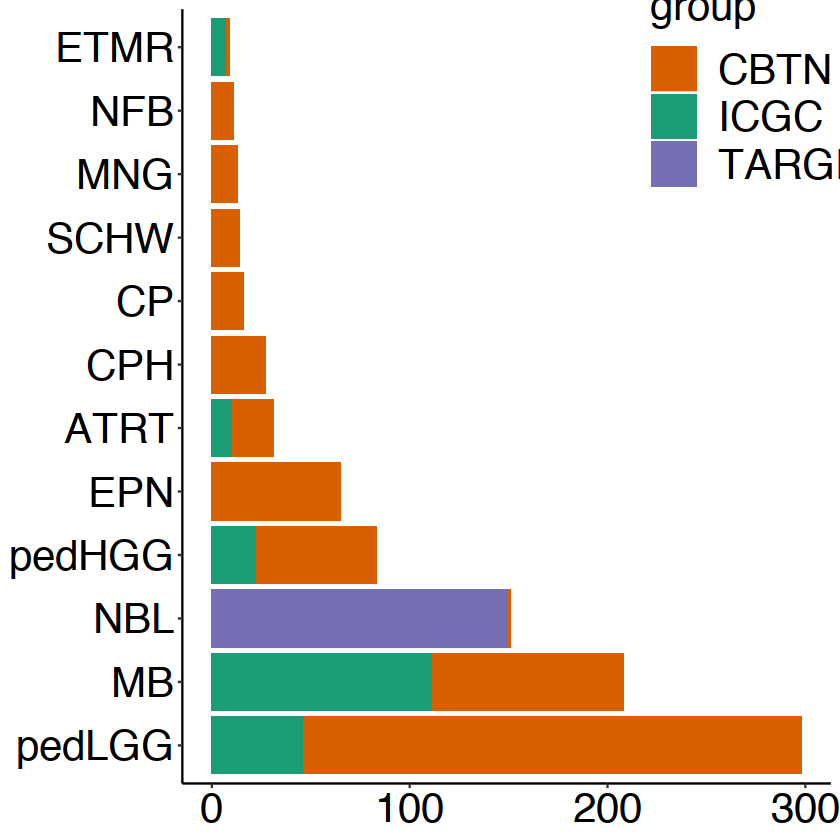

In [11]:
cancersplot

In [12]:
pdf(file = paste0(plotpath,"pedcancer_plot.pdf"),
    width = 10, height = 10, useDingbats = FALSE)
cancersplot
dev.off()

pdf 
  2